In [115]:
import numpy as np
import pandas as pd

In [116]:
df = pd.read_csv("./datasets/athlete_events.csv")
region_df = pd.read_csv("./datasets/noc_regions.csv")

In [117]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [118]:
df.shape

(271116, 15)

In [ ]:
df = df[df["Season"] == "Summer"]

In [120]:
df.shape

(222552, 15)

In [121]:
df = df.merge(region_df, on="NOC", how="left")

In [122]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [123]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [124]:
df.duplicated().sum()

np.int64(1385)

In [125]:
df.drop_duplicates(inplace=True)

In [126]:
df = pd.concat([df, pd.get_dummies(df["Medal"])], axis=1)

In [ ]:
df.groupby("NOC").sum()[["Gold", "Silver", "Bronze"]].sort_values(
    "Gold", ascending=False
).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,WIF,0,0,5
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


In [ ]:
medal_tally = df.drop_duplicates(
    subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"]
)

In [ ]:
medal_tally = (
    medal_tally.groupby("region")
    .sum()[["Gold", "Silver", "Bronze"]]
    .sort_values("Gold", ascending=False)
    .reset_index()
)

In [ ]:
medal_tally["total"] = (
    medal_tally["Gold"] + medal_tally["Silver"] + medal_tally["Bronze"]
)

In [131]:
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Vanuatu,0,0,0,0
201,"Virgin Islands, British",0,0,0,0
202,"Virgin Islands, US",0,1,0,1
203,Yemen,0,0,0,0


In [ ]:
years = df["Year"].unique().tolist()

In [133]:
years.sort()

In [134]:
years.insert(0, "Overall")

In [135]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [136]:
country = np.unique(df["region"].dropna().values).tolist()

In [137]:
country.sort()

In [139]:
country.insert(0, "Overall")

In [140]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [206]:
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(
        subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"]
    )
    flag = 0

    if year == "Overall" and country == "Overall":
        temp_df = medal_df
    if year == "Overall" and country != "Overall":
        flag = 1

        temp_df = medal_df[medal_df["region"] == country]
    if year != "Overall" and country == "Overall":
        temp_df = medal_df[medal_df["Year"] == int(year)]
    if year != "Overall" and country != "Overall":
        temp_df = medal_df[
            (medal_df["Year"] == int(year)) & (medal_df["region"] == country)
        ]

    if flag == 1:
        x = (
            temp_df.groupby("Year")
            .sum()[["Gold", "Silver", "Bronze"]]
            .sort_values("Year", ascending=True)
            .reset_index()
        )
    else:
        x = (
            temp_df.groupby("region")
            .sum()[["Gold", "Silver", "Bronze"]]
            .sort_values("Gold", ascending=False)
            .reset_index()
        )

    x["total"] = x["Gold"] + x["Silver"] + x["Bronze"]

    print(x)

In [208]:
fetch_medal_tally(df, year="Overall", country="India")

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


In [ ]:
df["Year"].unique().shape[0] - 1  # No of editions

28

In [ ]:
df["City"].unique().shape[0]  # No of cities

23

In [ ]:
df["Sport"].unique().shape[0]  # No of sports

52

In [ ]:
df["Event"].unique().shape[0]  # No of events

651

In [ ]:
nations_over_time = (
    df.drop_duplicates(["Year", "region"])["Year"]
    .value_counts()
    .reset_index()
    .sort_values("Year")
)

In [224]:
nations_over_time

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
23,1912,29
24,1920,29
21,1924,45
20,1928,46
19,1932,47


In [223]:
import plotly.express as px

In [226]:
fig = px.line(nations_over_time, x="Year", y="count")
fig.show()

In [ ]:
df.drop_duplicates(["Year", "Event"])["Year"].value_counts().reset_index().sort_values(
    "Year"
)

,Year,count
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [228]:
x = df.drop_duplicates(["Year", "Sport", "Event"])

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Year', ylabel='Sport'>

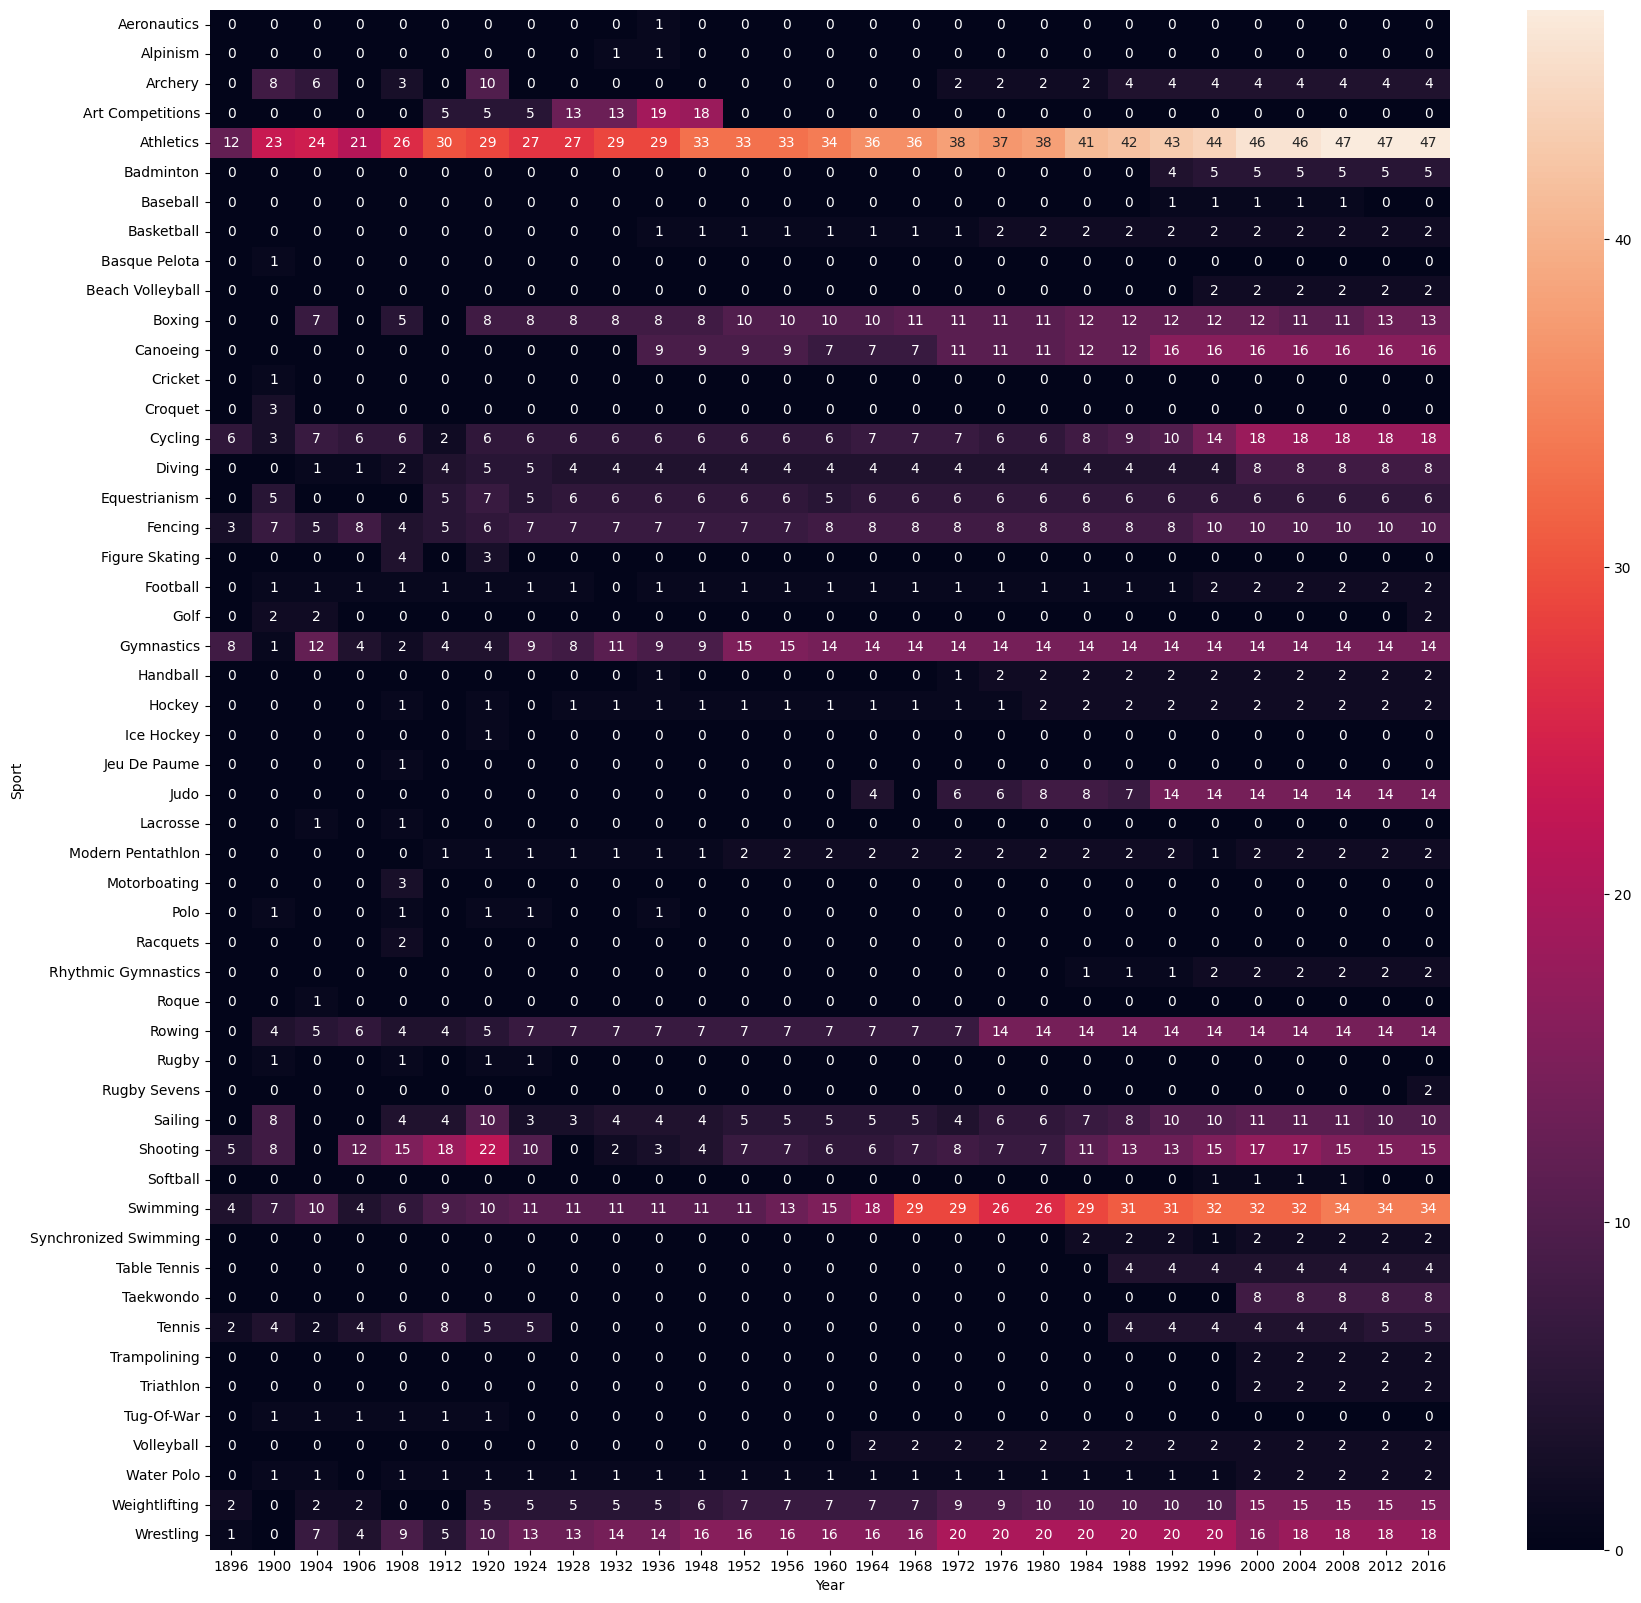

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    x.pivot_table(index="Sport", columns="Year", values="Event", aggfunc="count")
    .fillna(0)
    .astype(int),
    annot=True,
)

In [310]:
def most_successful(df, sport):
    df.columns = df.columns.str.strip()
    temp_df = df.dropna(subset=["Medal"])

    if sport != "Overall":
        temp_df = temp_df[temp_df["Sport"] == sport]

    # Count medals per athlete and rename properly
    top_athletes = (
        temp_df["Name"]
        .value_counts()
        .reset_index()
        .rename(
            columns={"Medal Count": "Name", "count": "Medal Count"}
        )  # Use this if column is still 'Name'
        .head(15)
    )

    # Merge with original df to get more info
    merged_df = top_athletes.merge(df, on="Name", how="left")[
        ["Name", "Medal Count", "Sport", "region"]
    ].drop_duplicates("Name")

    return merged_df.reset_index(drop=True)

In [288]:
most_successful(df, "Swimming")

,Name,Medal Count,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
1,Ryan Steven Lochte,12,Swimming,USA
2,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
3,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
4,Natalie Anne Coughlin (-Hall),12,Swimming,USA
5,Mark Andrew Spitz,11,Swimming,USA
6,"Matthew Nicholas ""Matt"" Biondi",11,Swimming,USA
7,Franziska van Almsick,10,Swimming,Germany
8,"Gary Wayne Hall, Jr.",10,Swimming,USA
9,Aleksandr Vladimirovich Popov,9,Swimming,Russia


In [294]:
# Country wise analysis

temp_df = df.dropna(subset=["Medal"])
temp_df.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"], inplace=True)

C:\Users\tarun\AppData\Local\Temp\ipykernel_23324\2433936130.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [300]:
new_df = temp_df[temp_df["region"] == "India"]
final_df = new_df.groupby("Year").count()["Medal"].reset_index()

In [301]:
fig = px.line(final_df, x="Year", y="Medal")
fig.show()

In [308]:
temp_df = df.dropna(subset=["Medal"])
temp_df.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"], inplace=True)

new_df = temp_df[temp_df["region"] == "China"]
final_df = new_df.pivot_table(index="Sport", columns="Year", values="Medal", aggfunc="count").fillna(0)

C:\Users\tarun\AppData\Local\Temp\ipykernel_23324\1427283400.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Year', ylabel='Sport'>

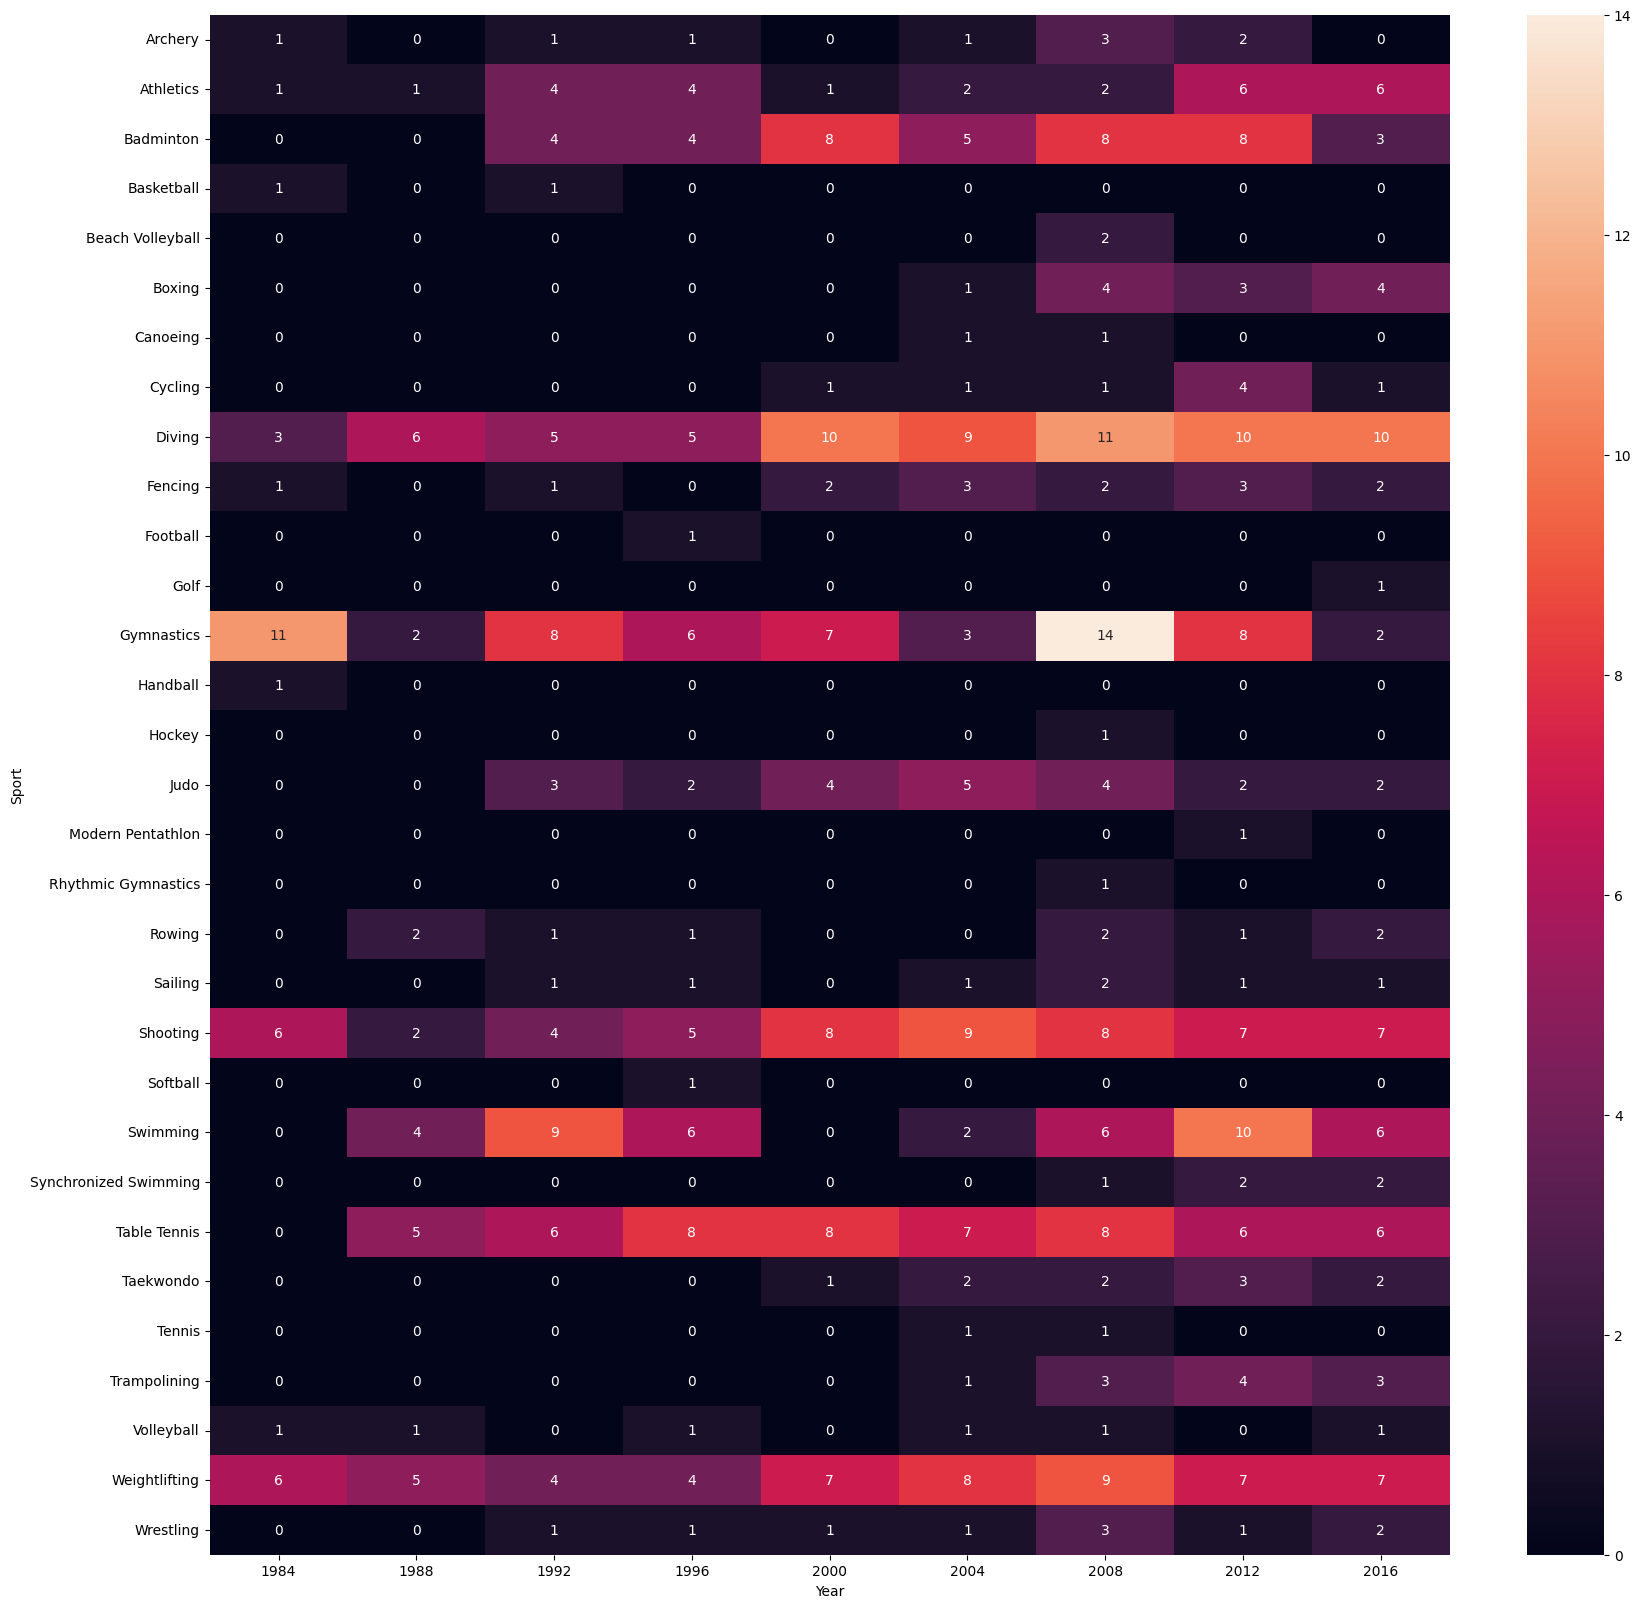

In [309]:
plt.figure(figsize=(20,20))

sns.heatmap(final_df, annot=True)

In [311]:
def most_successful_atheletes_country(df, country):
    df.columns = df.columns.str.strip()
    temp_df = df.dropna(subset=["Medal"])

    temp_df = temp_df[temp_df["region"] == country]

    # Count medals per athlete and rename properly
    top_athletes = (
        temp_df["Name"]
        .value_counts()
        .reset_index()
        .rename(
            columns={"Medal Count": "Name", "count": "Medal Count"}
        )  # Use this if column is still 'Name'
        .head(15)
    )

    # Merge with original df to get more info
    merged_df = top_athletes.merge(df, on="Name", how="left")[
        ["Name", "Medal Count", "Sport"]
    ].drop_duplicates("Name")

    return merged_df.reset_index(drop=True)

In [314]:
most_successful_atheletes_country(df, "USA")

,Name,Medal Count,Sport
0,"Michael Fred Phelps, II",28,Swimming
1,Ryan Steven Lochte,12,Swimming
2,Natalie Anne Coughlin (-Hall),12,Swimming
3,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
4,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
5,Mark Andrew Spitz,11,Swimming
6,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
7,Carl Townsend Osburn,11,Shooting
8,"Gary Wayne Hall, Jr.",10,Swimming
9,"Frederick Carlton ""Carl"" Lewis",10,Athletics


### Athlete Wise

In [ ]:
athlete_df = df.drop_duplicates(subset=["Name", "region"])

In [318]:
import plotly.figure_factory as ff

In [324]:
x1 = athlete_df["Age"].dropna()
x2 = athlete_df[athlete_df["Medal"] == "Gold"]["Age"].dropna()
x3 = athlete_df[athlete_df["Medal"] == "Silver"]["Age"].dropna()
x4 = athlete_df[athlete_df["Medal"] == "Bronze"]["Age"].dropna()

In [326]:
fig = ff.create_distplot([x1, x2, x3, x4], ["Overall Age", "Gold Medalist", "Silver Medalist", "Bronze Medalist"], show_rug=False, show_hist=False)
fig.show()